In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Task 1

## Part a)

In [2]:
data = pd.read_csv('Skyserver_CrossID5_27_2025 3_07_20 PM.csv',skiprows=1) # File retrieved from SQL search of SDSS survey

In [3]:
data.head()

,oiii_5007_flux,h_beta_flux,nii_6584_flux,h_alpha_flux,sii_6717_flux,sii_6731_flux,oi_6300_flux,h_alpha_eqw,ra,dec
0,27.17873,60.99668,83.45055,257.7383,47.29324,30.74085,8.836167,-25.67043,249.393412,1.189138
1,150.01270,138.19810,91.65990,440.6163,93.53133,67.46201,15.418050,-60.54794,197.353195,-1.065898
2,47.79645,92.63872,102.64330,372.1558,80.92642,63.32462,12.181040,-44.96117,202.581281,-1.142215
3,40.21773,78.99384,165.92440,472.9114,83.55533,67.03603,15.828480,-42.24768,218.551917,-1.163230
4,252.25380,305.22790,265.40910,1040.9550,191.69160,134.27260,33.044950,-63.34673,239.427638,-1.114635


In [4]:
data['y_values'] = np.log10(data['oiii_5007_flux']/data['h_beta_flux'])
data['x_values'] = np.log10(data['nii_6584_flux']/data['h_alpha_flux'])

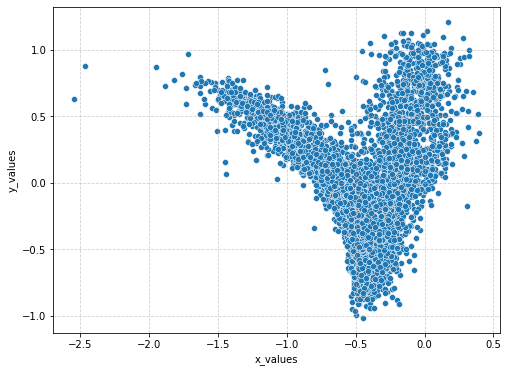

In [5]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data,x='x_values',y='y_values')
plt.grid(True,linestyle='--',alpha=0.6)

In [6]:
x_vals_e = np.linspace(-2, 0.34, 10000)
x_vals_a = np.linspace(-2, 0, 10000)
    
def kewley(logx):
    return np.where(logx <= 0.34, 0.61 / (logx - 0.47) + 1.19, -10)

def kauffmann(logx):
    return np.where(logx <= 0, 0.61 / (logx - 0.05) + 1.3, -10)

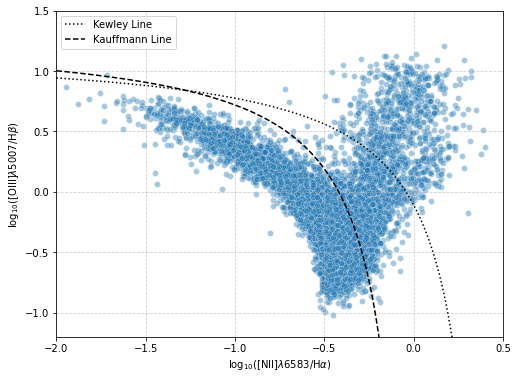

In [7]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data,x='x_values',y='y_values',alpha=0.4)
plt.plot(x_vals_e,kewley(x_vals_e),':',color='black',label='Kewley Line')
plt.plot(x_vals_a,kauffmann(x_vals_a),'--',color='black',label='Kauffmann Line')
plt.xlabel(r'$\log_{10}([\mathrm{NII}]\lambda6583 / \mathrm{H}\alpha)$')
plt.ylabel(r'$\log_{10}([\mathrm{OIII}]\lambda5007 / \mathrm{H}\beta)$')
plt.xlim(-2,0.5)
plt.ylim(-1.2,1.5)
plt.legend()
plt.grid(True,linestyle='--',alpha=0.6)

In [8]:
data['Type'] = 'Unclassified'
for i in range(10000):
    if np.log10(data['oiii_5007_flux'][i]/data['h_beta_flux'][i]) > kewley(np.log10(data['nii_6584_flux'][i]/data['h_alpha_flux'][i])):
        data['Type'][i] = 'AGN'
    elif np.log10(data['oiii_5007_flux'][i]/data['h_beta_flux'][i]) > kauffmann(np.log10(data['nii_6584_flux'][i]/data['h_alpha_flux'][i])):
        data['Type'][i] = 'Composites'
    else:
        data['Type'][i] = 'Galaxies'

/var/folders/b7/w_x6xn1j7qs2frhg7ptf7r9m0000gn/T/ipykernel_74407/954438223.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Type'][i] = 'Galaxies'
/var/folders/b7/w_x6xn1j7qs2frhg7ptf7r9m0000gn/T/ipykernel_74407/954438223.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Type'][i] = 'Composites'
/var/folders/b7/w_x6xn1j7qs2frhg7ptf7r9m0000gn/T/ipykernel_74407/954438223.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


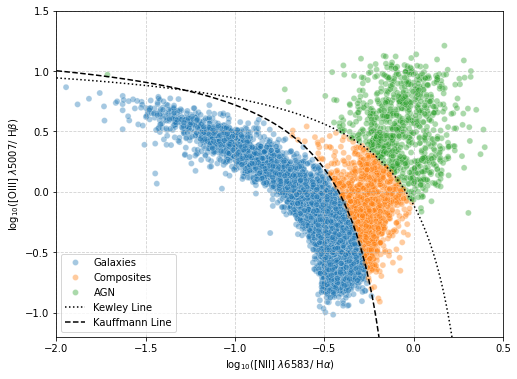

In [9]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data,x='x_values',y='y_values',hue='Type',alpha=0.4)
plt.plot(x_vals_e,kewley(x_vals_e),':',color='black',label='Kewley Line')
plt.plot(x_vals_a,kauffmann(x_vals_a),'--',color='black',label='Kauffmann Line')
plt.xlim(-2,0.5)
plt.ylim(-1.2,1.5)
plt.xlabel(r'$\log_{10}([\mathrm{NII}] \ \lambda6583 /  \ \mathrm{H}\alpha)$')
plt.ylabel(r'$\log_{10}([\mathrm{OIII}] \ \lambda5007 / \ \mathrm{H}\beta)$')
plt.legend()
plt.grid(True,linestyle='--',alpha=0.6)
#plt.savefig('BPT.png', bbox_inches='tight', pad_inches=0, transparent=True)

# Part b)

In [10]:
data['y2_values'] = np.log10(-data['h_alpha_eqw'])

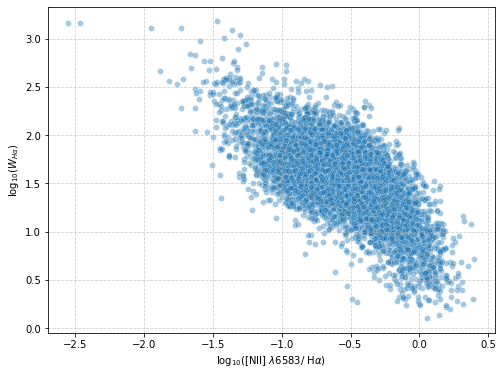

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data,x='x_values',y='y2_values',alpha=0.4)
plt.xlabel(r'$\log_{10}([\mathrm{NII}] \ \lambda6583 /  \ \mathrm{H}\alpha)$')
plt.ylabel(r'$\log_{10}(W_{H\alpha})$')
#plt.legend()
plt.grid(True,linestyle='--',alpha=0.6)

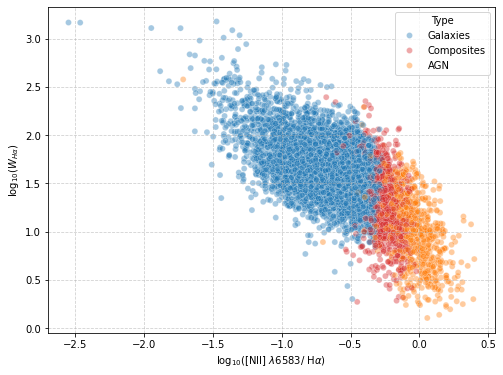

In [12]:
palette_dict = {
    'Galaxies': '#1f77b4',
    'Composites': '#d62728',
    'AGN': '#ff7f0e'
}
plt.figure(figsize=(8,6))
sns.scatterplot(data=data,x='x_values',y='y2_values',hue='Type' ,alpha=0.4,palette=palette_dict)
plt.xlabel(r'$\log_{10}([\mathrm{NII}] \ \lambda6583 /  \ \mathrm{H}\alpha)$')
plt.ylabel(r'$\log_{10}(W_{H\alpha})$')
#plt.legend()
plt.grid(True,linestyle='--',alpha=0.6)
#plt.savefig('WHAN_BPT.png', bbox_inches='tight', pad_inches=0, transparent=True)

In [13]:
data['Type_WHAN'] = 'Unclassified'
for i in range(10000):
    y= -data['h_alpha_eqw'][i]
    logx = data['x_values'][i]
    if (logx < -0.4) and (y > 3 ):
        data['Type_WHAN'][i] = 'Star-Forming'
    elif (logx > -0.4) and (y > 6 ):
        data['Type_WHAN'][i] = 'Seyfert'
    elif (logx > -0.4) and (y > 3 ):
        data['Type_WHAN'][i] = 'Weak AGN'
    else:
        data['Type_WHAN'][i] = 'RG'

/var/folders/b7/w_x6xn1j7qs2frhg7ptf7r9m0000gn/T/ipykernel_74407/1266683508.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Type_WHAN'][i] = 'Star-Forming'
/var/folders/b7/w_x6xn1j7qs2frhg7ptf7r9m0000gn/T/ipykernel_74407/1266683508.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Type_WHAN'][i] = 'Seyfert'
/var/folders/b7/w_x6xn1j7qs2frhg7ptf7r9m0000gn/T/ipykernel_74407/1266683508.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

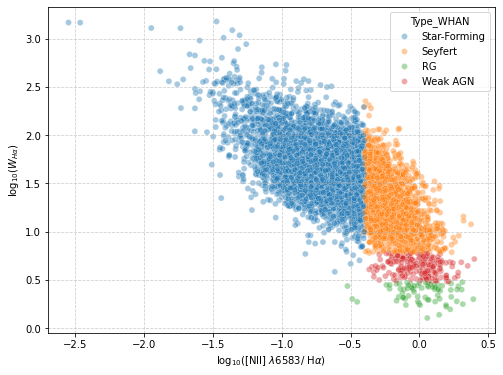

In [14]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data,x='x_values',y='y2_values',hue='Type_WHAN',alpha=0.4)
plt.xlabel(r'$\log_{10}([\mathrm{NII}] \ \lambda6583 /  \ \mathrm{H}\alpha)$')
plt.ylabel(r'$\log_{10}(W_{H\alpha})$')
#plt.legend()
plt.grid(True,linestyle='--',alpha=0.6)

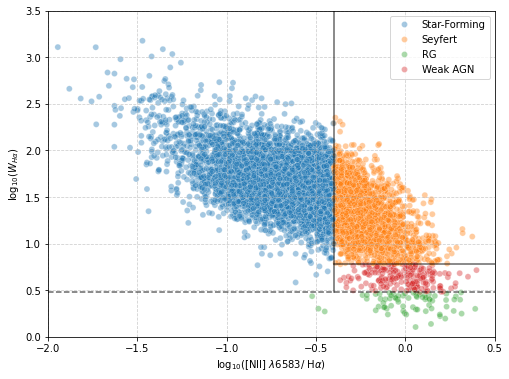

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data,x='x_values',y='y2_values',hue='Type_WHAN',alpha=0.4)
plt.xlim(-2,0.5)
plt.ylim(0,3.5)
plt.plot([-2,2],[np.log10(3),np.log10(3)],'--',color='black',alpha=0.6) #LOW
plt.plot([-0.4,2],[np.log10(6),np.log10(6)],'-',color='black',alpha=0.6) #MID
plt.plot([-0.4,-0.4],[np.log10(3),3.5],'-',color='black',alpha=0.6) #VERTICAL

plt.xlabel(r'$\log_{10}([\mathrm{NII}] \ \lambda6583 /  \ \mathrm{H}\alpha)$')
plt.ylabel(r'$\log_{10}(W_{H\alpha})$')
plt.legend()
plt.grid(True,linestyle='--',alpha=0.6)
#plt.savefig('WHAN.png', bbox_inches='tight', pad_inches=0, transparent=True)

In [16]:
count=0
count_w=0
for i in range(10000):
    if data['Type'][i] == 'AGN':
        count += 1
    if data['Type_WHAN'][i] == 'Seyfert':
        count_w += 1
BPT_N = count
WHAN_N = count_w
print(f"Number of AGN's in group using BPT diagram:                {count} ({round(count/100,1)}%)")
print(f"Number of Seyfert Galaxies in group using WHAN diagram:    {count_w} ({round(count_w/100,1)}%)")

Number of AGN's in group using BPT diagram:                805 (8.1%)
Number of Seyfert Galaxies in group using WHAN diagram:    2601 (26.0%)


In [17]:
count=0
for i in range(10000):
    if (data['Type'][i] == 'AGN') and (data['Type_WHAN'][i] == 'Seyfert'):
        count+=1
print(count)

594


# Task 2

In [18]:
names = [] # For the Cross-match ID, a txt file is needed including name, Ra and Dec:
ra = []
dec = []
for i in range(10000):
    #if (data['Type'][i] == 'AGN') or (data['Type_WHAN'][i] == 'Seyfert'):
    names.append(f'A{i}')
    ra.append(data['ra'][i])
    dec.append(data['dec'][i])

In [19]:
export = {'name':names,'ra':ra,'dec':dec}
df = pd.DataFrame(export)

In [20]:
data['name'] = names

In [21]:
df.head()

,name,ra,dec
0,A0,249.393412,1.189138
1,A1,197.353195,-1.065898
2,A2,202.581281,-1.142215
3,A3,218.551917,-1.163230
4,A4,239.427638,-1.114635


In [22]:
df.to_csv('crossmatch.txt',sep=' ', index=False)

In [23]:
wdf_1 = pd.read_csv('Skyserver_SQL5_27_2025 7_50_48 PM.csv',skiprows=1)
wdf_2 = pd.read_csv('Skyserver_SQL5_27_2025 7_48_31 PM.csv',skiprows=1) # My computer could not handle the request
wdf_3 = pd.read_csv('Skyserver_SQL5_27_2025 7_44_56 PM.csv',skiprows=1) # for all 10,000 at once, so I split it into
wdf_4 = pd.read_csv('Skyserver_SQL5_27_2025 7_42_23 PM.csv',skiprows=1) # 4 requests of 2500.

In [24]:
wdf = pd.concat([wdf_1, wdf_2, wdf_3, wdf_4])

In [25]:
wdf.reset_index(drop=True, inplace=True)

In [26]:
wdf['W1-W2 [mag]'] = wdf['w1'] - wdf['w2']
wdf['W2-W3 [mag]'] = wdf['w2'] - wdf['w3']

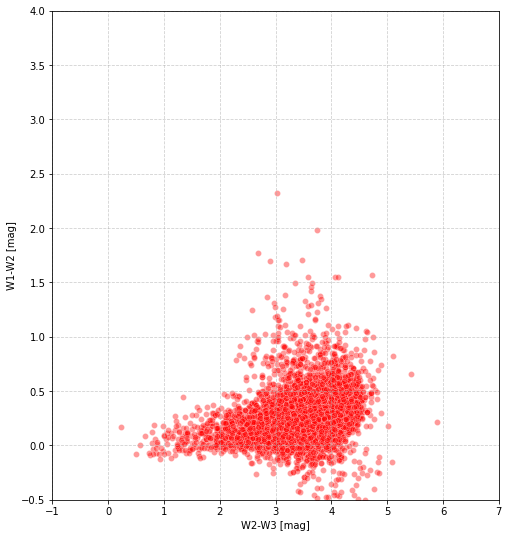

In [27]:
plt.figure(figsize=(8, 9)) # The shape and x and y limits of this plot were implemented such that it could be overlayed to Figure 12 in Wright et al. (2010).
sns.scatterplot(data=wdf,y='W1-W2 [mag]',x='W2-W3 [mag]',color='red',alpha=0.4)
#plt.legend()
plt.xlim(-1,7) 
plt.ylim(-0.5,4)
plt.grid(True,linestyle='--',alpha=0.6)

In [28]:
f0_W1 = 309.540
f0_W2 = 171.787 # (Jy)
f0_W3 = 31.674

In [29]:
# Compute fluxes
wdf['f_3.4'] = f0_W1 * 10 ** (-wdf['w1'] / 2.5)
wdf['f_4.6'] = f0_W2 * 10 ** (-wdf['w2'] / 2.5)
wdf['f_12'] = f0_W3 * 10 ** (-wdf['w3'] / 2.5)
wdf['Y'] = np.log10(wdf['f_4.6']/wdf['f_3.4'])
wdf['X'] = np.log10(wdf['f_12']/wdf['f_4.6'])
x_vals1 = np.linspace(0.03986,0.1566,2)
x_vals2 = np.linspace(0.03986,1.3,2)
x_vals3 = np.linspace(0.1566,1.3,2)
f1 = lambda x: -3.172*x + 0.436
f2 = lambda x: 0.315*x + 0.297
f3 = lambda x: 0.315*x - 0.110

/Users/jamiehoskyns/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


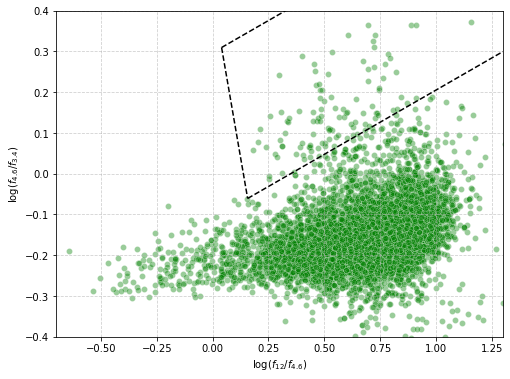

In [30]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=wdf,x='X',y='Y', color='green',alpha=0.4)
plt.xlabel(r'$\log(f_{12}/f_{4.6})$')
plt.ylabel(r'$\log(f_{4.6}/f_{3.4})$')
plt.plot(x_vals1,f1(x_vals1),'--',color='black')
plt.plot(x_vals2,f2(x_vals2),'--',color='black')
plt.plot(x_vals3,f3(x_vals3),'--',color='black')
#plt.legend()
plt.xlim(-0.7,1.3)
plt.ylim(-0.4,0.4)
plt.grid(True,linestyle='--',alpha=0.6)

In [31]:
f1i = lambda y: (0.436-y)/3.172

In [32]:
wdf['Type'] = 'Unclassified'
for i in range(10166):
    if (wdf['Y'][i] > f3(wdf['X'][i])) and (wdf['Y'][i] < f2(wdf['X'][i])) and (wdf['X'][i] > f1i(wdf['Y'][i])):
        wdf['Type'][i] = 'AGN'

/var/folders/b7/w_x6xn1j7qs2frhg7ptf7r9m0000gn/T/ipykernel_74407/3927969493.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wdf['Type'][i] = 'AGN'


In [33]:
count=0
for i in range(10166):
    if wdf['Type'][i] == 'AGN':
        count += 1
    
print(f"Number of AGN's in group using WISE diagram:                {count} ({round(count/29.43,1)}%)")

Number of AGN's in group using WISE diagram:                113 (3.8%)


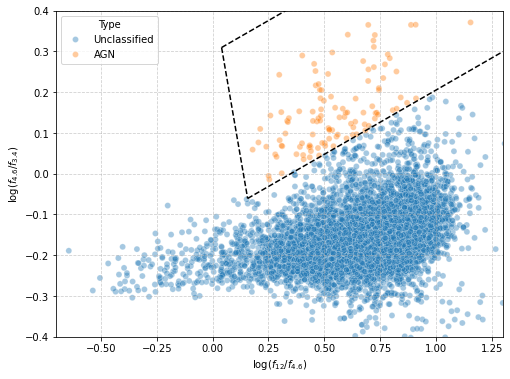

In [34]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=wdf,x='X',y='Y', color='green',hue='Type',alpha=0.4)
plt.xlabel(r'$\log(f_{12}/f_{4.6})$')
plt.ylabel(r'$\log(f_{4.6}/f_{3.4})$')
plt.plot(x_vals1,f1(x_vals1),'--',color='black')
plt.plot(x_vals2,f2(x_vals2),'--',color='black')
plt.plot(x_vals3,f3(x_vals3),'--',color='black')
#plt.legend()
plt.xlim(-0.7,1.3)
plt.ylim(-0.4,0.4)
plt.grid(True,linestyle='--',alpha=0.6)
#plt.savefig('WISE.png', bbox_inches='tight', pad_inches=0, transparent=True)

In [35]:
merged = pd.merge(wdf, data, on='name', suffixes=('WISE', 'SSDS'))

In [36]:
merged

,name,objID,w1,w2,w3,W1-W2 [mag],W2-W3 [mag],f_3.4,f_4.6,f_12,...,sii_6731_flux,oi_6300_flux,h_alpha_eqw,ra,dec,y_values,x_values,TypeSSDS,y2_values,Type_WHAN
0,A925,1237648673994834580,14.999,14.886,11.124,0.113,3.762,0.000310,0.000191,0.001125,...,43.58134,8.629285,-34.702510,242.928094,-0.044368,-0.350620,-0.509824,Galaxies,1.540361,Star-Forming
1,A252,1237648673996997574,13.974,13.902,10.173,0.072,3.729,0.000796,0.000472,0.002701,...,26.79257,8.923308,-15.643630,247.849736,-0.036038,-0.446388,-0.432844,Galaxies,1.194338,Star-Forming
2,A252,1237648673996997574,13.504,13.326,9.656,0.178,3.670,0.001228,0.000803,0.004348,...,26.79257,8.923308,-15.643630,247.849736,-0.036038,-0.446388,-0.432844,Galaxies,1.194338,Star-Forming
3,A339,1237648702992351918,14.219,14.017,9.926,0.202,4.091,0.000636,0.000425,0.003391,...,40.80895,14.930830,-26.028420,242.480489,-1.123613,-0.234604,-0.460205,Galaxies,1.415448,Star-Forming
4,A339,1237648702992351918,14.237,13.907,9.900,0.330,4.007,0.000625,0.000470,0.003473,...,40.80895,14.930830,-26.028420,242.480489,-1.123613,-0.234604,-0.460205,Galaxies,1.415448,Star-Forming
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10161,A9478,1237660024521949423,16.191,15.740,11.904,0.451,3.836,0.000103,0.000087,0.000548,...,30.67421,10.480600,-43.873240,41.629185,-1.098019,0.229415,-0.901422,Galaxies,1.642200,Star-Forming
10162,A8393,1237657589240889490,14.464,14.255,12.157,0.209,2.098,0.000507,0.000341,0.000434,...,21.78752,12.622310,-8.479813,153.262727,49.488053,0.212712,-0.115503,AGN,0.928386,Seyfert
10163,A9784,1237654391639441642,14.860,14.704,12.158,0.156,2.546,0.000352,0.000226,0.000434,...,37.47033,8.360739,-33.440590,118.598737,38.670550,0.076288,-0.712501,Galaxies,1.524274,Star-Forming
10164,A9152,1237654382520107156,16.161,16.392,12.356,-0.231,4.036,0.000106,0.000048,0.000362,...,42.11711,13.344780,-109.439200,155.801376,59.241934,0.527203,-1.049259,Galaxies,2.039173,Star-Forming


In [37]:
count=0
for i in range(10166):
    if (merged['TypeSSDS'][i] == merged['TypeWISE'][i]) or (merged['Type_WHAN'][i]=='Seyfert' and merged['TypeWISE'][i] =='AGN'):
        count+=1
print(f"Number of AGN's agreed on by BPT AND WISE diagram:                {count} ")

Number of AGN's agreed on by BPT AND WISE diagram:                86 


# Task 3

In [38]:
df3 = pd.read_csv('task3.csv')

In [39]:
len(df3)

7755

In [40]:
df3.head()

,wavelength,flux_density,flux_density_unc
0,800.5,0.149,0.074
1,801.5,0.000,0.260
2,802.5,0.676,0.227
3,803.5,0.000,0.222
4,804.5,0.413,0.159


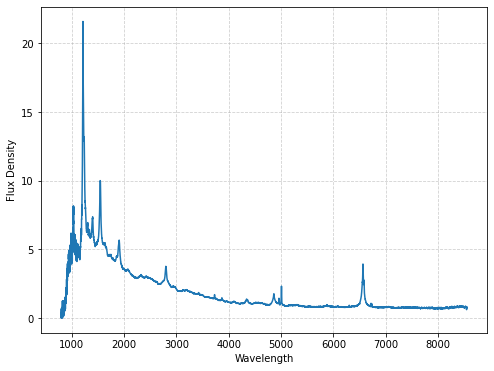

In [41]:
plt.figure(figsize=(8,6))
sns.lineplot(data=df3,x='wavelength',y='flux_density')
plt.xlabel('Wavelength')
plt.ylabel('Flux Density')
plt.grid(True,linestyle='--',alpha=0.6)
plt.savefig('Table1.png', bbox_inches='tight', pad_inches=0.1, transparent=True)
plt.show()

In [43]:
z = [0.5,1.0,1.5,2.0,2.5,3.0] # 6 different redshift cases
z1,z2,z3,z4,z5,z6 = [],[],[],[],[],[]
for i in range(7755):
    z1.append((1+z[0]) * df3['wavelength'][i])
    z2.append((1+z[1]) * df3['wavelength'][i])
    z3.append((1+z[2]) * df3['wavelength'][i])
    z4.append((1+z[3]) * df3['wavelength'][i])
    z5.append((1+z[4]) * df3['wavelength'][i])
    z6.append((1+z[5]) * df3['wavelength'][i])
df3['z1'] = z1
df3['z2'] = z2
df3['z3'] = z3
df3['z4'] = z4
df3['z5'] = z5
df3['z6'] = z6

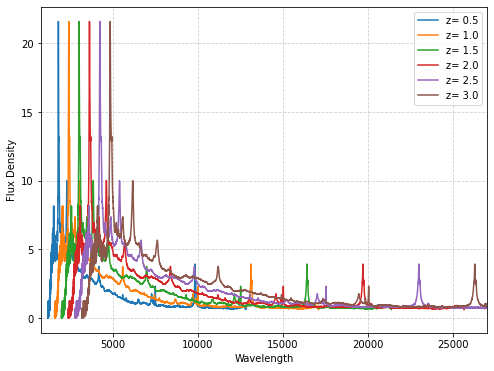

In [44]:
names = ['z1','z2','z3','z4','z5','z6']
plt.figure(figsize=(8,6))
for i in range(6):
    sns.lineplot(data=df3,x=names[i],y='flux_density',label=f'z= {z[i]}')
plt.xlim(800,27000)
#plt.ylim(-0.1,10.5)
plt.xlabel('Wavelength')
plt.ylabel('Flux Density')
plt.grid(True,linestyle='--',alpha=0.6)
#plt.savefig('redshift.png', bbox_inches='tight', pad_inches=0.1, transparent=True)
plt.show()

In [45]:
data_z05 = {'wavelength': df3['z1'],
           'flux' : df3['flux_density'],
           'flux_unc' : df3['flux_density_unc']}
data_z10 = {'wavelength': df3['z2'],
           'flux' : df3['flux_density'],
           'flux_unc' : df3['flux_density_unc']}
data_z15 = {'wavelength': df3['z3'],
           'flux' : df3['flux_density'],
           'flux_unc' : df3['flux_density_unc']}
data_z20 = {'wavelength': df3['z4'],
           'flux' : df3['flux_density'],
           'flux_unc' : df3['flux_density_unc']}
data_z25 = {'wavelength': df3['z5'],
           'flux' : df3['flux_density'],
           'flux_unc' : df3['flux_density_unc']}
data_z30 = {'wavelength': df3['z6'],
           'flux' : df3['flux_density'],
           'flux_unc' : df3['flux_density_unc']}


In [46]:
dfz05 = pd.DataFrame(data_z05)
dfz10 = pd.DataFrame(data_z10)
dfz15 = pd.DataFrame(data_z15)
dfz20 = pd.DataFrame(data_z20)
dfz25 = pd.DataFrame(data_z25)
dfz30 = pd.DataFrame(data_z30)

In [47]:
dfz05.to_csv('z05.txt', sep=' ',index=False)
dfz10.to_csv('z10.txt', sep=' ',index=False)
dfz15.to_csv('z15.txt', sep=' ',index=False) # Data exported to be used in fantasy modelling
dfz20.to_csv('z20.txt', sep=' ',index=False)
dfz25.to_csv('z25.txt', sep=' ',index=False)
dfz30.to_csv('z30.txt', sep=' ',index=False)

In [48]:
A = 0.0158
B = A*5200**2.01

In [49]:
df3['low'] = (A * df3['wavelength']**(0.45)) 
df3['high'] = (B * (df3['wavelength'])**(-1.56)) 

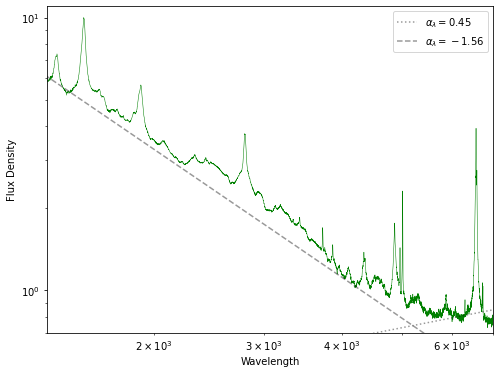

In [50]:
plt.figure(figsize=(8,6))
sns.lineplot(data=df3,x='wavelength',y='flux_density',color='green',linewidth='0.5')
plt.xscale('log')
plt.yscale('log')
sns.lineplot(data=df3,x='wavelength',y='low',linestyle=':',color='black',label=r'$\alpha_\lambda = 0.45 $',alpha=0.4)
sns.lineplot(data=df3,x='wavelength',y='high',linestyle='--',color='black',label=r'$\alpha_\lambda = -1.56 $',alpha=0.4)
plt.xlim(1350,7000)
plt.ylim(0.7,11)
plt.xlabel('Wavelength')
plt.ylabel('Flux Density')
#plt.grid(True,linestyle='--',alpha=0.6)
plt.savefig('fig5.png', bbox_inches='tight', pad_inches=0.1, transparent=True)
plt.show()#Fig 5 in 

In [51]:
df3['y'] = df3['flux_density']/100

In [52]:
# I modified filters_viz() in photRM to take two arrays and plot them while doing the more complex bands plot.
# This allowed me to create the following plots, of my specific spectra against the LSST bands.

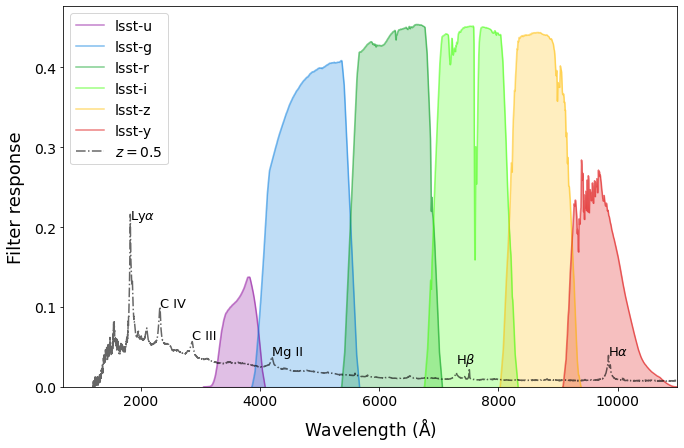

In [53]:
import photRM
photRM.filters_viz(z=z[0], phot_sys='LSST', save=False, comp_spec_path='./data/',x=df3[names[0]],y=df3['y'])
plt.savefig('3.png',bbox_inches='tight', pad_inches=0.1, transparent=True)

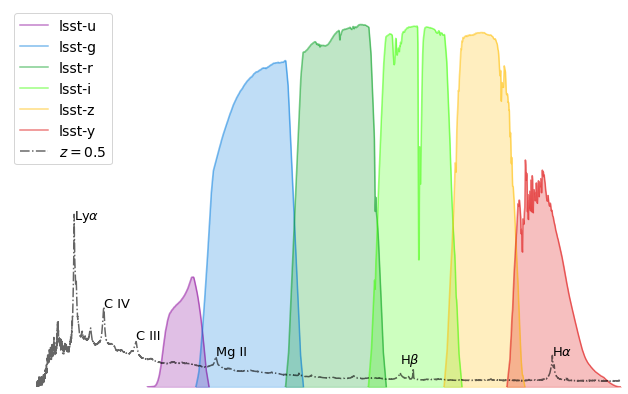

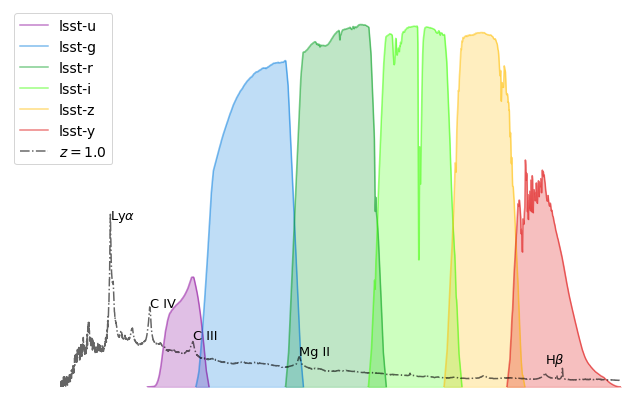

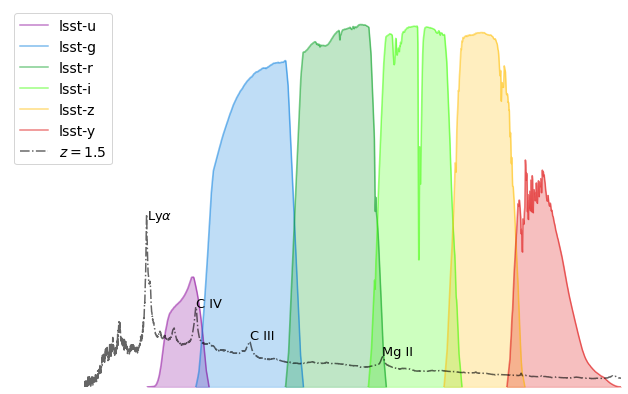

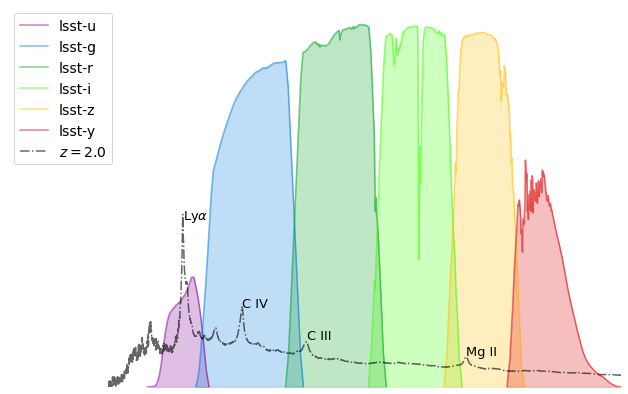

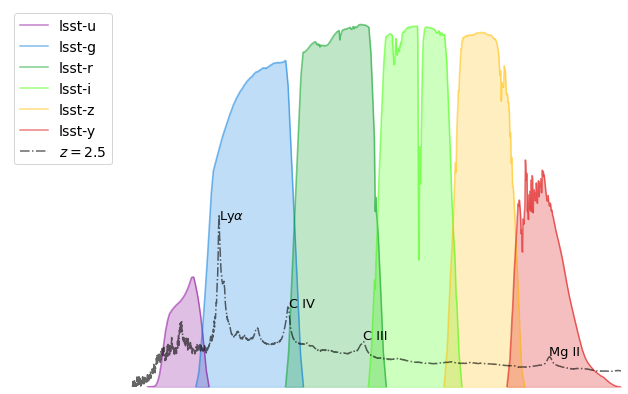

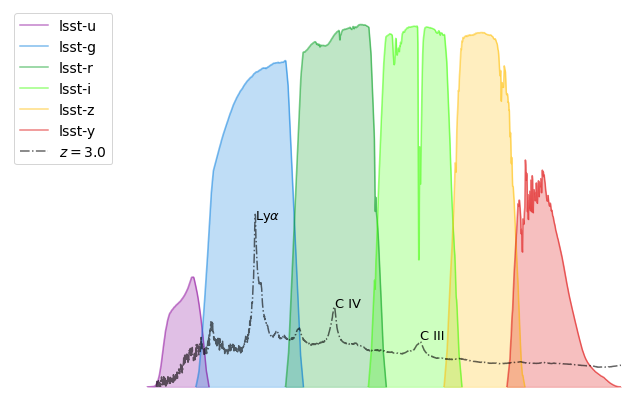

In [54]:
for i in range(6):
    photRM.filters_viz1(z=z[i], phot_sys='LSST', save=False, comp_spec_path='./data/',x=df3[names[i]],y=df3['y'])
    plt.savefig(f'3.{i+1}.png', bbox_inches='tight', pad_inches=0)

# Using fantasy

In [55]:
#Before starting, we call some of the standard python packages, such as matplotlib, pandas, numpy, etc.
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

import numpy as np
import pandas as pd

import glob

In [56]:
import sys
print(sys.version)

3.9.7 (default, Sep 16 2021, 08:50:36) 
[Clang 10.0.0 ]


In [57]:
from fantasy_agn.tools import read_sdss, read_text, read_gama_fits

# Below command import the necessary commands, which will be described later
from fantasy_agn.models import create_input_folder

from fantasy_agn.models import create_feii_model, create_model, create_tied_model, continuum, create_line, create_fixed_model

ImportError: cannot import name 'SherpaFloat' from 'sherpa.utils' (/Users/jamiehoskyns/opt/anaconda3/lib/python3.9/site-packages/sherpa/utils/__init__.py)

**The use of fantasy in this project was conducted in a seperate notebook with a local environment compatable to the packages it uses.**

# Task 4

In [58]:
df4_0 = pd.read_csv('4.2106392.csv',sep=' ',skiprows=0)
df4_1 = pd.read_csv('4.2107076.csv',sep=' ',skiprows=0)
df4_2 = pd.read_csv('4.2107339.csv',sep=' ',skiprows=0)
df4_3 = pd.read_csv('4.2107686.csv',sep=' ',skiprows=0)
df4_4 = pd.read_csv('4.2108440.csv',sep=' ',skiprows=0)
df4_5 = pd.read_csv('4.2108870.csv',sep=' ',skiprows=0)
df4_6 = pd.read_csv('4.2109029.csv',sep=' ',skiprows=0)
df4_7 = pd.read_csv('4.2109241.csv',sep=' ',skiprows=0)
df4_8 = pd.read_csv('4.2109295.csv',sep=' ',skiprows=0)
df4_9 = pd.read_csv('4.233.csv',sep=' ',skiprows=0)

df4_b0 = pd.read_csv('b0.csv',sep=' ',skiprows=0)
df4_b1 = pd.read_csv('b1.csv',sep=' ',skiprows=0)
df4_b2 = pd.read_csv('b2.csv',sep=' ',skiprows=0)
df4_b3 = pd.read_csv('b3.csv',sep=' ',skiprows=0)
df4_b4 = pd.read_csv('b4.csv',sep=' ',skiprows=0)
df4_b5 = pd.read_csv('b5.csv',sep=' ',skiprows=0)
df4_b6 = pd.read_csv('b6.csv',sep=' ',skiprows=0)
df4_b7 = pd.read_csv('b7.csv',sep=' ',skiprows=0)
df4_b8 = pd.read_csv('b8.csv',sep=' ',skiprows=0)
df4_b9 = pd.read_csv('b9.csv',sep=' ',skiprows=0)

In [59]:
df4_0

,MJD_u,u,u_err,MJD_g,g,g_err,MJD_r,r,r_err,MJD_i,i,i_err,MJD_z,z,z_err,ra_median,dec_median
0,51075.405305,19.858,0.036,51075.406971,19.378,0.012,51075.403638,19.197,0.012,51075.404471,18.904,0.015,51075.406138,18.791,0.058,38.067832,0.36933
1,51818.374948,19.926,0.042,51818.376614,19.347,0.012,51818.373281,19.180,0.012,51818.374114,18.862,0.013,51818.375781,18.806,0.050,38.067832,0.36933
2,52170.425976,19.629,0.037,52170.427642,19.108,0.010,52170.424309,18.993,0.011,52170.425142,18.724,0.012,52170.426809,18.647,0.041,38.067832,0.36933
3,52171.363120,19.592,0.037,52171.364786,19.096,0.010,52171.361453,19.007,0.011,52171.362286,18.723,0.012,52171.363953,18.672,0.046,38.067832,0.36933
4,52173.339343,19.613,0.040,52173.341009,19.094,0.010,52173.337676,18.984,0.012,52173.338509,18.718,0.014,52173.340176,18.761,0.052,38.067832,0.36933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,54392.425625,19.472,0.037,54392.427292,19.062,0.025,54392.423959,18.884,0.013,54392.424792,18.641,0.018,54392.426459,18.553,0.036,38.067832,0.36933
67,54403.341822,19.653,0.103,54403.343488,18.944,0.041,54403.340155,18.856,0.038,54403.340988,18.612,0.035,54403.342655,18.754,0.091,38.067832,0.36933
68,54405.397336,-99.990,0.051,54405.399002,18.984,0.020,54405.395669,18.890,0.018,54405.396502,18.605,0.020,54405.398169,18.544,0.045,38.067832,0.36933
69,54406.335673,19.509,0.032,54406.337340,19.017,0.025,54406.334006,18.866,0.024,54406.334840,18.588,0.017,54406.336506,18.480,0.030,38.067832,0.36933


In [60]:
# Choosing which band to use:

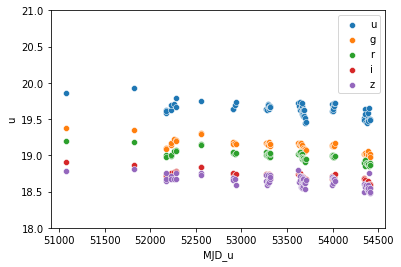

In [61]:
bands = ['u','g','r','i','z']
dates = ['MJD_u','MJD_g','MJD_r','MJD_i','MJD_z']
for i in range(5):
    sns.scatterplot(data=df4_0,y=bands[i],x=dates[i],label=bands[i])
    plt.ylim(18,21)

In [62]:
# Take only the r-band data

In [63]:
data0 = {'mjd': df4_0['MJD_r'],'mag': df4_0['r'], 'magerr': df4_0['r_err'] }
data1 = {'mjd': df4_1['MJD_r'],'mag': df4_1['r'], 'magerr': df4_1['r_err'] }
data2 = {'mjd': df4_2['MJD_r'],'mag': df4_2['r'], 'magerr': df4_2['r_err'] }
data3 = {'mjd': df4_3['MJD_r'],'mag': df4_3['r'], 'magerr': df4_3['r_err'] }
data4 = {'mjd': df4_4['MJD_r'],'mag': df4_4['r'], 'magerr': df4_4['r_err'] }
data5 = {'mjd': df4_5['MJD_r'],'mag': df4_5['r'], 'magerr': df4_5['r_err'] }
data6 = {'mjd': df4_6['MJD_r'],'mag': df4_6['r'], 'magerr': df4_6['r_err'] }
data7 = {'mjd': df4_7['MJD_r'],'mag': df4_7['r'], 'magerr': df4_7['r_err'] }
data8 = {'mjd': df4_8['MJD_r'],'mag': df4_8['r'], 'magerr': df4_8['r_err'] }
data9 = {'mjd': df4_9['MJD_r'],'mag': df4_9['r'], 'magerr': df4_9['r_err'] }

datab0 = {'mjd': df4_b0['MJD_r'],'mag': df4_b0['r'], 'magerr': df4_b0['r_err'] }
datab1 = {'mjd': df4_b1['MJD_r'],'mag': df4_b1['r'], 'magerr': df4_b1['r_err'] }
datab2 = {'mjd': df4_b2['MJD_r'],'mag': df4_b2['r'], 'magerr': df4_b2['r_err'] }
datab3 = {'mjd': df4_b3['MJD_r'],'mag': df4_b3['r'], 'magerr': df4_b3['r_err'] }
datab4 = {'mjd': df4_b4['MJD_r'],'mag': df4_b4['r'], 'magerr': df4_b4['r_err'] }
datab5 = {'mjd': df4_b5['MJD_r'],'mag': df4_b5['r'], 'magerr': df4_b5['r_err'] }
datab6 = {'mjd': df4_b6['MJD_r'],'mag': df4_b6['r'], 'magerr': df4_b6['r_err'] }
datab7 = {'mjd': df4_b7['MJD_r'],'mag': df4_b7['r'], 'magerr': df4_b7['r_err'] }
datab8 = {'mjd': df4_b8['MJD_r'],'mag': df4_b8['r'], 'magerr': df4_b8['r_err'] }
datab9 = {'mjd': df4_b9['MJD_r'],'mag': df4_b9['r'], 'magerr': df4_b9['r_err'] }

In [64]:
df5_0_dirty = pd.DataFrame(data0)
df5_1_dirty = pd.DataFrame(data1)
df5_2_dirty = pd.DataFrame(data2)
df5_3_dirty = pd.DataFrame(data3)
df5_4_dirty = pd.DataFrame(data4)
df5_5_dirty = pd.DataFrame(data5)
df5_6_dirty = pd.DataFrame(data6)
df5_7_dirty = pd.DataFrame(data7)
df5_8_dirty = pd.DataFrame(data8)
df5_9_dirty = pd.DataFrame(data9)

df5_b0_dirty = pd.DataFrame(data0)
df5_b1_dirty = pd.DataFrame(data1)
df5_b2_dirty = pd.DataFrame(data2)
df5_b3_dirty = pd.DataFrame(data3)
df5_b4_dirty = pd.DataFrame(data4)
df5_b5_dirty = pd.DataFrame(data5)
df5_b6_dirty = pd.DataFrame(data6)
df5_b7_dirty = pd.DataFrame(data7)
df5_b8_dirty = pd.DataFrame(data8)
df5_b9_dirty = pd.DataFrame(data9)

In [65]:
df5_0_dirty.to_csv('1.csv', index=False)
df5_1_dirty.to_csv('2.csv', index=False)
df5_2_dirty.to_csv('3.csv', index=False)
df5_3_dirty.to_csv('4.csv', index=False)
df5_4_dirty.to_csv('5.csv', index=False)
df5_5_dirty.to_csv('6.csv', index=False)
df5_6_dirty.to_csv('7.csv', index=False)
df5_7_dirty.to_csv('8.csv', index=False)
df5_8_dirty.to_csv('9.csv', index=False)
df5_9_dirty.to_csv('10.csv', index=False)

df5_b0_dirty.to_csv('11.csv', index=False)
df5_b1_dirty.to_csv('12.csv', index=False)
df5_b2_dirty.to_csv('13.csv', index=False)
df5_b3_dirty.to_csv('14.csv', index=False)
df5_b4_dirty.to_csv('15.csv', index=False)
df5_b5_dirty.to_csv('16.csv', index=False)
df5_b6_dirty.to_csv('17.csv', index=False)
df5_b7_dirty.to_csv('18.csv', index=False)
df5_b8_dirty.to_csv('19.csv', index=False)
df5_b9_dirty.to_csv('20.csv', index=False)

In [66]:
df5_dirty = [df5_0_dirty, df5_1_dirty,df5_2_dirty,df5_3_dirty,df5_4_dirty,df5_5_dirty,df5_6_dirty,df5_7_dirty,df5_8_dirty,
             df5_9_dirty,df5_b0_dirty,df5_b1_dirty,df5_b2_dirty,df5_b3_dirty,df5_b4_dirty,
             df5_b5_dirty,df5_b6_dirty,df5_b7_dirty,df5_b8_dirty, df5_b9_dirty]  
df5_clean = [df[df['mag'] != -99.99] for df in df5_dirty]

In [67]:
df_plot = df5_clean[13].sort_values(by='mjd')

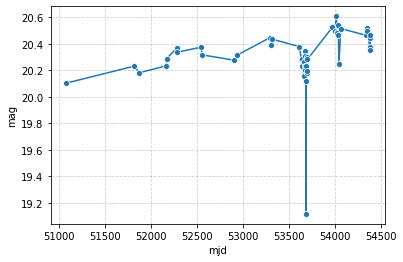

In [68]:
sns.lineplot(data=df_plot,x='mjd',y='mag',marker='o')
plt.grid(True,linestyle='--',alpha=0.6)
#plt.xlim(53500,53800)
plt.savefig('QSOLC13.png', bbox_inches='tight', pad_inches=0.1, transparent=True)

# Create Info Sheet

In [69]:
# I will define a 'gap' as 300 days.

In [70]:
def count_gaps(array, gap_threshold=300):
    array = np.sort(array)  # Ensure the array is sorted
    diffs = np.diff(array)  # Calculate differences between consecutive elements
    return np.sum(diffs >= gap_threshold)

In [71]:
def mean_s(times):
    times = np.sort(times)  # Make sure times are sorted
    intervals = np.diff(times)  # Differences between consecutive times
    mean_dt = np.mean(intervals)
    return mean_dt

In [72]:
def median_s(times):
    times = np.sort(times)  # Make sure times are sorted
    intervals = np.diff(times)  # Differences between consecutive times
    median_dt = np.median(intervals)
    return median_dt

In [73]:
df5_all = []

for i in range(20):
    df5_all.append(df5_clean[i])

number_of_points = [len(df) for df in df5_all]
number_of_gaps = [count_gaps(df['mjd']) for df in df5_all]
mean_sample_interval = [mean_s(df['mjd']) for df in df5_all]
median_sample_interval = [median_s(df['mjd']) for df in df5_all]
median_mag = [df['mag'].median() for df in df5_all]
mean_mag = [df['mag'].mean() for df in df5_all]
max_mag = [df['mag'].max() for df in df5_all]
min_mag = [df['mag'].min() for df in df5_all]
variability = np.array(max_mag) - np.array(min_mag)

In [74]:
print(variability)

[0.349 0.999 0.61  1.493 0.7   0.99  0.334 0.581 0.518 0.345 0.349 0.999
 0.61  1.493 0.7   0.99  0.334 0.581 0.518 0.345]


In [75]:
data_info = {
    'Number of Points' : number_of_points,
    'Number of Gaps' : number_of_gaps,
    'Mean Sampling Interval' : mean_sample_interval,
    'Median Sampling Interval' : median_sample_interval,
    'Mean Magnitude' : mean_mag,
    'Median Magnitude' : median_mag, 
    'Maximum Magnitude' : max_mag, 
    'Minimum Magnitude' : min_mag,
    'Variability Amplitude' : variability
}
info_sheet = pd.DataFrame(data_info)

In [76]:
info_sheet.head()

,Number of Points,Number of Gaps,Mean Sampling Interval,Median Sampling Interval,Mean Magnitude,Median Magnitude,Maximum Magnitude,Minimum Magnitude,Variability Amplitude
0,68,5,49.805315,4.936730,18.986309,18.991,19.197,18.848,0.349
1,61,6,55.615935,3.997176,20.312066,20.225,20.794,19.795,0.999
2,47,5,72.542524,7.510794,21.802830,21.820,22.159,21.549,0.610
3,49,3,69.000508,5.559354,20.316510,20.317,20.608,19.115,1.493
4,69,5,49.072884,4.005327,20.559449,20.573,20.982,20.282,0.700


In [77]:
metrics = info_sheet.columns

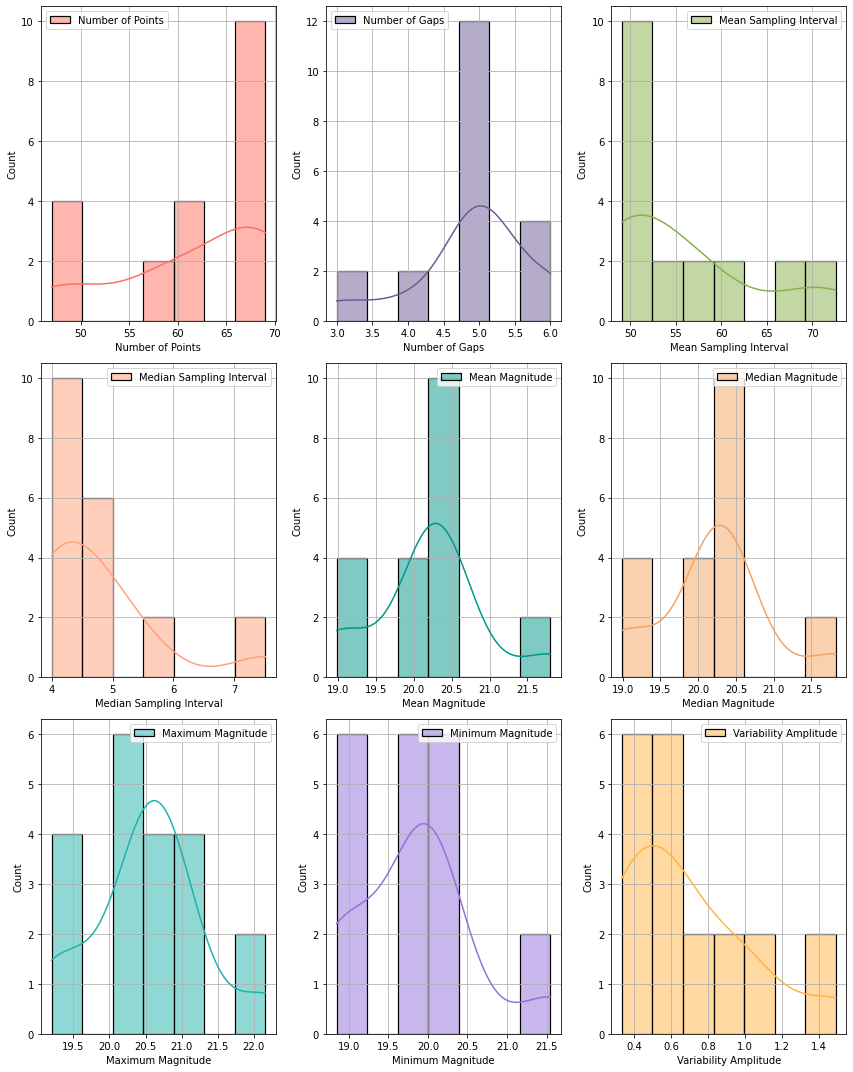

In [78]:
fig, axes = plt.subplots(3, 3, figsize=(12, 15))
axes = axes.flatten()
colors = ['#FF6F61', '#6B5B95', '#88B04B', '#FFA07A', 
          '#009688', '#F4A460', '#20B2AA', '#9370DB', '#FFB347']

# Loop through metrics and plot
for i, metric in enumerate(metrics):
    sns.histplot(info_sheet[metric], kde=True, bins=7, ax=axes[i],color = colors[i],edgecolor='#000000',linewidth=1.2, label=metric)
    axes[i].legend()
    axes[i].set_xlabel(metric)
    axes[i].set_ylabel('Count')
    axes[i].grid(True)

# Adjust layout
plt.tight_layout()
#plt.savefig('hists.png', bbox_inches='tight', pad_inches=0.1, transparent=True)
plt.show()

In [79]:
info_sheet_rounded = info_sheet.round(2)

In [80]:
info_sheet_rounded.to_csv('Info Sheet Task 4')

In [81]:
latex_table = info_sheet_rounded.to_latex(index=False) # Include info sheet in report appendix
print(latex_table)

\begin{tabular}{rrrrrrrrr}
\toprule
 Number of Points &  Number of Gaps &  Mean Sampling Interval &  Median Sampling Interval &  Mean Magnitude &  Median Magnitude &  Maximum Magnitude &  Minimum Magnitude &  Variability Amplitude \\
\midrule
               68 &               5 &                   49.81 &                      4.94 &           18.99 &             18.99 &              19.20 &              18.85 &                   0.35 \\
               61 &               6 &                   55.62 &                      4.00 &           20.31 &             20.23 &              20.79 &              19.80 &                   1.00 \\
               47 &               5 &                   72.54 &                      7.51 &           21.80 &             21.82 &              22.16 &              21.55 &                   0.61 \\
               49 &               3 &                   69.00 &                      5.56 &           20.32 &             20.32 &              20.61 &             

Applying QNpy package to these quasar light curves was conducted in a seperate notebook with a local environment specificly outlined in requirements.txt - https://github.com/kittytheastronaut/QNPy-0.0.2/blob/main/requirements.txt